<a href="https://colab.research.google.com/github/SumaiyaZohaRODELA/Evaluating-Vector-Databases-for-Image-Similarity-Search-Cultural-Pattern-Detection/blob/main/Softcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import pathlib
import os

In [ ]:
# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('GPU is available')
else:
    print('No GPU detected')

num_gpus = len(physical_devices)

if num_gpus > 0:
    print(f"Number of available GPUs: {num_gpus}")
    for i in range(num_gpus):
        print(f"GPU {i}: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("No GPUs available")

device = tf.device('gpu:0' if len(physical_devices) > 0 else 'cpu:0')


No GPU detected
No GPUs available


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/milito'
os.listdir(data_dir)

['12.jpeg',
 '84.jpeg',
 '29.jpeg',
 '112.jpeg',
 '129.jpeg',
 '201.jpeg',
 '301.jpeg',
 '433.jpeg',
 '1774.jpeg',
 '1759.jpeg',
 '1746.jpeg',
 '1790.jpeg',
 '1813.jpeg',
 '2564.jpeg',
 '2636.jpeg',
 '2847.jpeg',
 '0.jpeg',
 '3723.jpeg',
 '4347.jpeg',
 '4323.jpeg',
 '4330.jpeg',
 '4315.jpeg',
 '4588.jpeg',
 '4626.jpeg',
 '4590.jpeg',
 '4625.jpeg',
 '7045.jpeg',
 '7037.jpeg',
 '7054.jpeg',
 '7061.jpeg',
 '40.jpeg',
 '144.jpeg',
 '156.jpeg',
 '173.jpeg',
 '229.jpeg',
 '316.jpeg',
 '289.jpeg',
 '478.jpeg',
 '477.jpeg',
 '490.jpeg',
 '1758.jpeg',
 '1775.jpeg',
 '1883.jpeg',
 '1855.jpeg',
 '1867.jpeg',
 '1800.jpeg',
 '2658.jpeg',
 '2565.jpeg',
 '2596.jpeg',
 '2694.jpeg',
 '3165.jpeg',
 '3164.jpeg',
 '3200.jpeg',
 '3734.jpeg',
 '4355.jpeg',
 '4540.jpeg',
 '4589.jpeg',
 '7038.jpeg',
 '7053.jpeg',
 '13.jpeg',
 '28.jpeg',
 '85.jpeg',
 '261.jpeg',
 '328.jpeg',
 '345.jpeg',
 '344.jpeg',
 '432.jpeg',
 '462.jpeg',
 '1773.jpeg',
 '1818.jpeg',
 '1899.jpeg',
 '2539.jpeg',
 '3238.jpeg',
 '3691.jpeg',
 

In [ ]:
dataset_path = "/content/drive/MyDrive/milito"
classes = os.listdir(dataset_path)
print("Classes:", classes)
print("Number of classes:", len(classes))


Classes: ['12.jpeg', '84.jpeg', '29.jpeg', '112.jpeg', '129.jpeg', '201.jpeg', '301.jpeg', '433.jpeg', '1774.jpeg', '1759.jpeg', '1746.jpeg', '1790.jpeg', '1813.jpeg', '2564.jpeg', '2636.jpeg', '2847.jpeg', '0.jpeg', '3723.jpeg', '4347.jpeg', '4323.jpeg', '4330.jpeg', '4315.jpeg', '4588.jpeg', '4626.jpeg', '4590.jpeg', '4625.jpeg', '7045.jpeg', '7037.jpeg', '7054.jpeg', '7061.jpeg', '40.jpeg', '144.jpeg', '156.jpeg', '173.jpeg', '229.jpeg', '316.jpeg', '289.jpeg', '478.jpeg', '477.jpeg', '490.jpeg', '1758.jpeg', '1775.jpeg', '1883.jpeg', '1855.jpeg', '1867.jpeg', '1800.jpeg', '2658.jpeg', '2565.jpeg', '2596.jpeg', '2694.jpeg', '3165.jpeg', '3164.jpeg', '3200.jpeg', '3734.jpeg', '4355.jpeg', '4540.jpeg', '4589.jpeg', '7038.jpeg', '7053.jpeg', '13.jpeg', '28.jpeg', '85.jpeg', '261.jpeg', '328.jpeg', '345.jpeg', '344.jpeg', '432.jpeg', '462.jpeg', '1773.jpeg', '1818.jpeg', '1899.jpeg', '2539.jpeg', '3238.jpeg', '3691.jpeg', '3707.jpeg', '3766.jpeg', '4354.jpeg', '4534.jpeg', '4604.jpeg', 

Resizing data / preprocessing

In [ ]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'training', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

test_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'validation', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory /content/drive/MyDrive/milito. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
filenames = pathlib.Path(data_dir)
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

NameError: name 'train_data' is not defined

In [ ]:
train_set = train_data.take(150)
val_set = train_data.skip(150)

In [ ]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy()

In [ ]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

In [ ]:


# Get class names from `image_dataset_from_directory`
class_names = train_data.class_names  # Correct way to extract class names

plt.figure(figsize=(15, 15))

for images, labels in train_set.take(1):  # Take one batch
    for i in range(15):
        index = random.randint(0, len(images) - 1)  # Ensure correct indexing
        ax = plt.subplot(3, 5, i + 1)

        plt.imshow(images[index].numpy().astype("uint8"))  # Convert tensor to NumPy
        plt.title(class_names[labels[index].numpy()])  # Correct class name extraction
        plt.axis("off")  # Hide axis

plt.show()


NameError: name 'train_data' is not defined

ekhan theke shuru

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,838,976 (56.61 MB)

 Trainable params: 14,838,976 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Faiss

In [ ]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 57.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from glob import glob
from sentence_transformers import SentenceTransformer
import faiss
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from collections import Counter


In [ ]:

# Define dataset paths
IMAGES_PATH = '/content/drive/MyDrive/test_Sharee'  # Update with correct dataset path
OUTPUT_INDEX_PATH = '/content/drive/MyDrive/vector.index'


In [ ]:

# Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:

def get_label_from_path(img_path):
    """Extracts class label from folder name."""
    return os.path.basename(os.path.dirname(img_path))

def generate_clip_embeddings(images_path, model):
    """Generates embeddings and labels."""
    image_paths = glob(os.path.join(images_path, '**/*.jpg'), recursive=True)

    embeddings = []
    labels = []

    for img_path in image_paths:
        try:
            image = Image.open(img_path).convert('RGB')
            embedding = model.encode(image)
            embeddings.append(embedding)
            labels.append(get_label_from_path(img_path))  # Extract class label
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return embeddings, image_paths, labels


In [ ]:

# Generate embeddings and labels
embeddings, image_paths, labels = generate_clip_embeddings(IMAGES_PATH, model)

# Convert labels to numeric classes
unique_classes = list(set(labels))
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}
numeric_labels = np.array([class_to_index[label] for label in labels])

# Check class distribution
print(f"Class Distribution: {Counter(labels)}")



Class Distribution: Counter()


In [ ]:
# Split dataset into train and test (ensuring balanced classes)
train_emb, test_emb, train_paths, test_paths, train_labels, test_labels = train_test_split(
    embeddings, image_paths, numeric_labels, test_size=0.2, stratify=numeric_labels, random_state=42
)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:


def create_faiss_index(embeddings, image_paths, output_path):
    """Creates FAISS index using ONLY training embeddings."""
    if len(embeddings) == 0:
        raise ValueError("No embeddings found. Check dataset path.")

    dimension = len(embeddings[0])
    index = faiss.IndexFlatIP(dimension)  # Inner product for similarity
    index = faiss.IndexIDMap(index)

    vectors = np.array(embeddings).astype(np.float32)
    ids = np.arange(len(embeddings)).astype(np.int64)  # Unique IDs

    index.add_with_ids(vectors, ids)
    faiss.write_index(index, output_path)

    with open(output_path + '.paths', 'w') as f:
        for img_path in image_paths:
            f.write(img_path + '\n')

    print(f"FAISS index saved at: {output_path}")
    return index

# Ensure FAISS index is built ONLY on training embeddings
index = create_faiss_index(train_emb, train_paths, OUTPUT_INDEX_PATH)


NameError: name 'train_emb' is not defined

In [ ]:

def load_faiss_index(index_path):
    """Loads FAISS index and image paths."""
    index = faiss.read_index(index_path)
    with open(index_path + '.paths', 'r') as f:
        image_paths = [line.strip() for line in f]
    print(f"FAISS index loaded from: {index_path}")
    return index, image_paths

index, image_paths = load_faiss_index(OUTPUT_INDEX_PATH)


RuntimeError: Error in faiss::FileIOReader::FileIOReader(const char*) at /project/faiss/faiss/impl/io.cpp:67: Error: 'f' failed: could not open /content/drive/MyDrive/vector.index for reading: No such file or directory

In [ ]:

def retrieve_similar_images(query, model, index, image_paths, top_k=3):
    """Retrieves similar images using FAISS."""
    if not os.path.exists(query):
        print(f"Error: Query image '{query}' not found. Please provide a valid image path.")
        return None, None

    query_image = Image.open(query).convert('RGB')
    query_features = model.encode(query_image).astype(np.float32).reshape(1, -1)
    distances, indices = index.search(query_features, top_k)

    retrieved_images = [image_paths[int(idx)] for idx in indices[0]]
    return query_image, retrieved_images


In [ ]:

def visualize_results(query, retrieved_images):
    """Displays query image and retrieved images."""
    if query is None or retrieved_images is None:
        print("Error: No images retrieved.")
        return

    fig, ax = plt.subplots(1, len(retrieved_images) + 1, figsize=(15, 5))

    ax[0].imshow(query)
    ax[0].set_title('Query')
    ax[0].axis('off')

    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path)
        ax[i + 1].imshow(image)
        ax[i + 1].set_title(f"Match {i + 1}")
        ax[i + 1].axis('off')

    plt.show()


In [ ]:

# Search with a reference image (Ensure path is correct)
query_path = '/content/drive/MyDrive/c9df058e-25c0-4ba6-81da-6494ed33a42a.jpg'  # Update this
query, retrieved_images = retrieve_similar_images(query_path, model, index, image_paths, top_k=4)

if query is not None:
    visualize_results(query, retrieved_images)


NameError: name 'index' is not defined

In [ ]:
def evaluate_faiss(index, query_vectors, ground_truth, k=5):
    num_queries = len(query_vectors)

    if num_queries == 0:
        print("No queries to evaluate.")
        return 0, 0, 0

    if index.ntotal == 0:
        print("FAISS index is empty. Add vectors before evaluating.")
        return 0, 0, 0

    print(f"Evaluating {num_queries} queries against {index.ntotal} vectors...")

    # FAISS search
    D, I = index.search(query_vectors, k)  # I: Retrieved indices, D: Distances
    print("Sample retrieved indices:", I[:5])  # Debug print

    recall_at_k = 0
    mean_ap = 0
    mrr = 0

    for i in range(num_queries):
        retrieved = I[i]
        relevant = ground_truth[i]

        # Recall@K
        if relevant in retrieved:
            recall_at_k += 1

        # Mean Average Precision
        ap = 0
        correct = 0
        for rank, retrieved_idx in enumerate(retrieved, start=1):
            if retrieved_idx == relevant:
                correct += 1
                ap += correct / rank
        if correct > 0:
            mean_ap += ap / correct

        # Mean Reciprocal Rank
        for rank, retrieved_idx in enumerate(retrieved, start=1):
            if retrieved_idx == relevant:
                mrr += 1 / rank
                break

    # Normalize scores
    recall_at_k /= num_queries
    mean_ap /= num_queries
    mrr /= num_queries

    print(f"Recall@{k}: {recall_at_k:.4f}")
    print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")

    return recall_at_k, mean_ap, mrr


In [ ]:
import faiss
import numpy as np

def create_faiss_index(database_vectors, metric="L2"):
    """
    Creates and populates a FAISS index.
    :param database_vectors: (NumPy array) The database of vectors to index.
    :param metric: Distance metric ("L2" for Euclidean, "IP" for Cosine similarity).
    :return: FAISS index
    """
    if database_vectors is None or len(database_vectors) == 0:
        raise ValueError("Database vectors are empty or None.")

    d = database_vectors.shape[1]  # Dimensionality

    if metric == "L2":
        index = faiss.IndexFlatL2(d)  # L2 distance
    elif metric == "IP":
        faiss.normalize_L2(database_vectors)  # Normalize for cosine similarity
        index = faiss.IndexFlatIP(d)  # Inner Product
    else:
        raise ValueError("Unsupported metric. Use 'L2' or 'IP'.")

    index.add(database_vectors)  # Add vectors to index
    return index

def generate_ground_truth(index, query_vectors):
    """
    Uses FAISS to find the closest ground truth for each query vector.
    :param index: FAISS index
    :param query_vectors: Query vectors to test.
    :return: Ground truth indices (list)
    """
    if query_vectors is None or len(query_vectors) == 0:
        raise ValueError("Query vectors are empty or None.")

    _, ground_truth = index.search(query_vectors, 1)  # Get closest match per query
    return ground_truth.flatten().tolist()  # Convert to list

def evaluate_faiss(index, query_vectors, ground_truth, k=5, metric="L2"):
    """
    Evaluates the FAISS index using Recall@K, Mean Average Precision (mAP), and Mean Reciprocal Rank (MRR).
    :param index: FAISS index
    :param query_vectors: Query vectors to test.
    :param ground_truth: Ground truth nearest neighbor indices.
    :param k: Number of nearest neighbors to retrieve.
    :param metric: Distance metric ("L2" or "IP").
    :return: Recall@K, mAP, MRR
    """
    num_queries = len(query_vectors)

    if num_queries == 0 or index.ntotal == 0:
        print("No queries or FAISS index is empty.")
        return 0, 0, 0

    # Normalize query vectors if using cosine similarity
    if metric == "IP":
        faiss.normalize_L2(query_vectors)

    print(f"\nEvaluating {num_queries} queries against {index.ntotal} indexed vectors...")

    # FAISS search
    D, I = index.search(query_vectors, k)  # I: Retrieved indices, D: Distances

    print("\nSample Retrieved Indices:\n", I[:5])
    print("Sample Distances:\n", D[:5])
    print("Ground Truth Indices:\n", ground_truth[:5])

    recall_at_k = np.mean([ground_truth[i] in I[i] for i in range(num_queries)])
    mean_ap = np.mean([
        np.mean([1 / (rank + 1) for rank, retrieved_idx in enumerate(I[i]) if retrieved_idx == ground_truth[i]])
        if ground_truth[i] in I[i] else 0 for i in range(num_queries)
    ])
    mrr = np.mean([
        1 / (np.where(I[i] == ground_truth[i])[0][0] + 1) if ground_truth[i] in I[i] else 0
        for i in range(num_queries)
    ])

    print("\nEvaluation Metrics:")
    print(f"Recall@{k}: {recall_at_k:.4f}")
    print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")

    return recall_at_k, mean_ap, mrr

# ====== 🚀 Example Usage ======

# Uncomment below for reproducibility
# np.random.seed(42)

dim = 128  # Feature vector size
num_database = 1000
num_queries = 20  # Increased for better evaluation

# Generate more realistic vectors (normal distribution)
database_vectors = np.random.randn(num_database, dim).astype(np.float32)
query_vectors = np.random.randn(num_queries, dim).astype(np.float32)

# Shuffle database vectors to prevent ordered bias
np.random.shuffle(database_vectors)

# Choose distance metric ("L2" or "IP" for cosine similarity)
metric = "L2"  # Switched to L2 to see more variation

# Debug: Check the first vectors to ensure they are reasonable
print("\nFirst Query Vector:\n", query_vectors[0][:10])  # Print first 10 dimensions
print("\nFirst Database Vector:\n", database_vectors[0][:10])

# Create FAISS index and add database vectors
index = create_faiss_index(database_vectors, metric)

# Generate correct ground truth using FAISS search
ground_truth = generate_ground_truth(index, query_vectors)

# Evaluate FAISS retrieval
evaluate_faiss(index, query_vectors, ground_truth, k=5, metric=metric)



First Query Vector:
 [-0.15607753  0.05682631  1.6108133   2.0322304   0.06089582  0.10022226
 -0.249948    1.8204514   1.180259    1.0632935 ]

First Database Vector:
 [-1.9950339  -0.343564    0.43418378  2.2533655  -1.4460751  -0.01929468
 -1.8257335   0.52819484  0.30467415  0.32710987]

Evaluating 20 queries against 1000 indexed vectors...

Sample Retrieved Indices:
 [[155 829 521 821 572]
 [917 829 254 179 317]
 [711 719 958 587 472]
 [ 45 414 835 485 618]
 [728 928 495 786 891]]
Sample Distances:
 [[194.11719 199.39093 202.44885 204.52425 206.38928]
 [192.98155 193.68486 194.56558 195.5372  195.74954]
 [149.04059 163.90538 166.56593 167.52713 169.47614]
 [177.01973 181.83096 195.4904  196.40881 196.74332]
 [168.69485 174.7486  175.49329 178.07373 179.5236 ]]
Ground Truth Indices:
 [155, 917, 711, 45, 728]

Evaluation Metrics:
Recall@5: 1.0000
Mean Average Precision (mAP): 1.0000
Mean Reciprocal Rank (MRR): 1.0000


(1.0, 1.0, 1.0)

eikhan theke softcom shuruuuu


In [ ]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-o1daatmc
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-o1daatmc
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras import layers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import pathlib
import os
from google.colab import drive
from tensorflow.keras import layers, models
from sentence_transformers import SentenceTransformer
import faiss
from PIL import Image
from glob import glob
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/test_Sharee'))


[]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/test_Sharee


In [ ]:
import os
print("Path exists:", os.path.exists('/content/drive/MyDrive/test_Sharee'))
print("Contents:", os.listdir('/content/drive/MyDrive/test_Sharee') if os.path.exists('/content/drive/MyDrive/test_Sharee') else "Directory not found")


Path exists: True
Contents: []


In [ ]:
!find /content/drive/MyDrive/test_Sharee -type f


In [ ]:
import os
directory = "/content/drive/MyDrive/test_Sharee"
for filename in os.listdir(directory):
    if filename.endswith(".jfif") or filename.endswith(".webp"):
        new_filename = filename.split('.')[0] + ".jpg"
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))


In [ ]:
import os
import shutil

# Define paths
data_dir = "/content/drive/MyDrive/test_Sharee"
new_data_dir = "/content/drive/MyDrive/test_Sharee_fixed"
class_name = "default_class"

# Create a new directory with a subfolder
os.makedirs(os.path.join(new_data_dir, class_name), exist_ok=True)

# Move images into the new subfolder
for file in os.listdir(data_dir):
    if file.endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        shutil.move(os.path.join(data_dir, file), os.path.join(new_data_dir, class_name, file))

print("Dataset reorganized successfully!")


Dataset reorganized successfully!


In [ ]:
train_data = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/test_Sharee_fixed",
    seed=1,
    shuffle=True,
    batch_size=16,
    image_size=(256, 256)
)


Found 1940 files belonging to 1 classes.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sentence_transformers import SentenceTransformer
import faiss
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# ====== UPDATED DATASET PATH ======
data_dir = "/content/drive/MyDrive/test_Sharee_fixed"

# ====== LOAD IMAGE DATASET ======
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.1, subset='training', seed=42, shuffle=True, batch_size=16, image_size=(256, 256)
)

test_data = keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.1, subset='validation', seed=42, shuffle=True, batch_size=16, image_size=(256, 256)
)

# ====== CLASS NAMES ======
class_names = train_data.class_names
print(f"Number of Classes: {len(class_names)}, Class Names: {class_names}")

# ====== BUILD CNN MODEL ======
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Only 1 class, use sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ====== LOAD CLIP MODEL ======
clip_model = SentenceTransformer('clip-ViT-B-32')

# ====== GENERATE CLIP EMBEDDINGS ======
def generate_clip_embeddings(images_path, model):
    image_paths = glob(os.path.join(images_path, 'default_class', '*.*'))
    embeddings, labels = [], []

    for img_path in image_paths:
        try:
            image = Image.open(img_path).convert('RGB')
            embedding = model.encode(image)
            embeddings.append(embedding)
            labels.append(img_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return np.array(embeddings), image_paths, labels

embeddings, image_paths, labels = generate_clip_embeddings(data_dir, clip_model)

# ====== FAISS INDEXING ======
def create_faiss_index(embeddings, image_paths, output_path):
    if len(embeddings) == 0:
        raise ValueError("No embeddings found. Check dataset path.")

    d = embeddings.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(embeddings.astype(np.float32))
    faiss.write_index(index, output_path)

    with open(output_path + '.paths', 'w') as f:
        for img_path in image_paths:
            f.write(img_path + '\n')

    print(f"FAISS index saved at: {output_path}")
    return index

OUTPUT_INDEX_PATH = '/content/drive/MyDrive/vector.index'
index = create_faiss_index(embeddings, image_paths, OUTPUT_INDEX_PATH)

# ====== SEARCH FUNCTION ======
def retrieve_similar_images(query, model, index, image_paths, top_k=3):
    if not os.path.exists(query):
        print(f"Error: Query image '{query}' not found.")
        return None, None

    query_image = Image.open(query).convert('RGB')
    query_features = model.encode(query_image).astype(np.float32).reshape(1, -1)
    distances, indices = index.search(query_features, top_k)

    return query_image, [image_paths[int(idx)] for idx in indices[0]]

# ====== VISUALIZATION ======
def visualize_results(query, retrieved_images):
    if query is None or retrieved_images is None:
        print("Error: No images retrieved.")
        return

    fig, ax = plt.subplots(1, len(retrieved_images) + 1, figsize=(15, 5))
    ax[0].imshow(query)
    ax[0].set_title('Query')
    ax[0].axis('off')

    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path)
        ax[i + 1].imshow(image)
        ax[i + 1].set_title(f"Match {i + 1}")
        ax[i + 1].axis('off')

    plt.show()

# ====== TEST SEARCH ======
query_path = '/content/drive/MyDrive/c9df058e-25c0-4ba6-81da-6494ed33a42a.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, clip_model, index, image_paths, top_k=4)

query_path = '/content/drive/MyDrive/images78.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, clip_model, index, image_paths, top_k=4)


if query is not None:
    visualize_results(query, retrieved_images)


Found 1940 files belonging to 1 classes.
Using 1746 files for training.
Found 1940 files belonging to 1 classes.
Using 194 files for validation.
Number of Classes: 1, Class Names: ['default_class']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

FAISS index saved at: /content/drive/MyDrive/vector.index
Error: Query image '/content/drive/MyDrive/images78.jpg' not found.


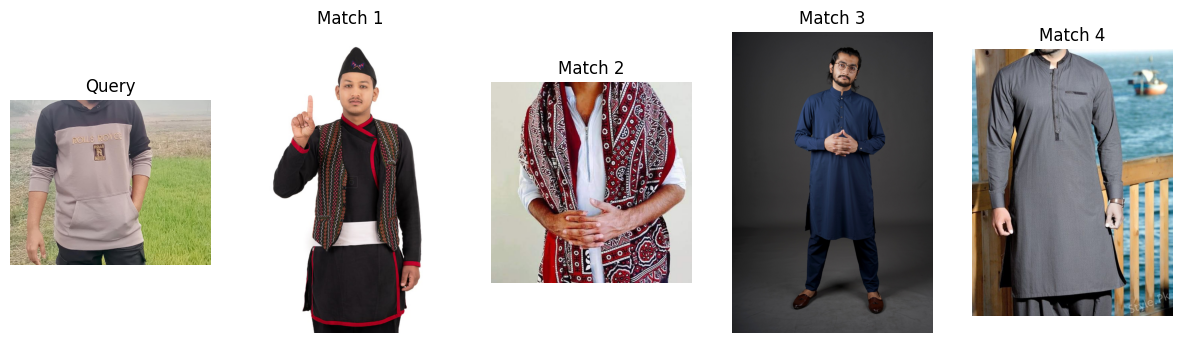

In [ ]:
query_path = '/content/drive/MyDrive/Whats.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, clip_model, index, image_paths, top_k=4)

if query is not None:
    visualize_results(query, retrieved_images)


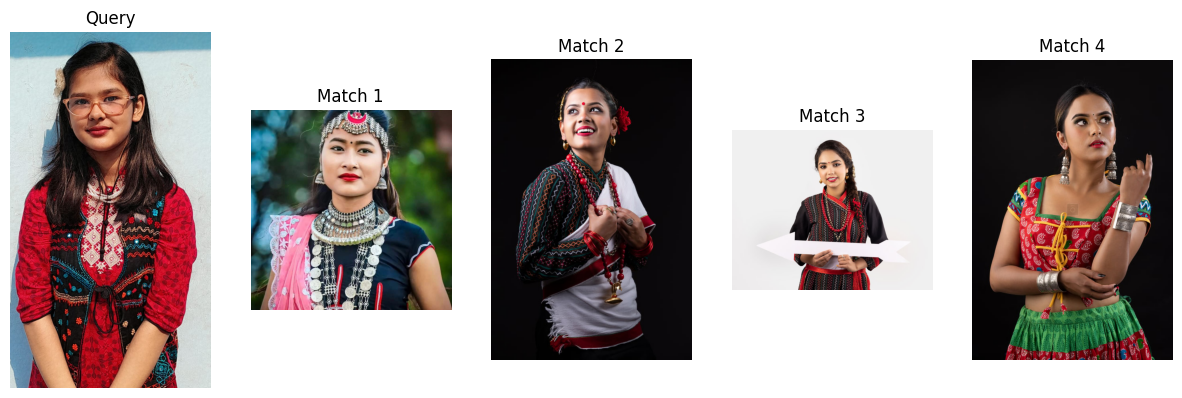

In [ ]:

query_path = '/content/drive/MyDrive/Rameen.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, clip_model, index, image_paths, top_k=4)


if query is not None:
    visualize_results(query, retrieved_images)


EVALUATION RESULT OF FAISS - CLIP

Found 1940 files belonging to 1 classes.
Using 1746 files for training.
Found 1940 files belonging to 1 classes.
Using 194 files for validation.
Number of Classes: 1, Class Names: ['default_class']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

FAISS index saved at: /content/drive/MyDrive/vector.index
Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/3603.jpeg
Retrieved Images: ['/content/drive/MyDrive/test_Sharee_fixed/default_class/3603.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3523.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3520.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3766.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3597.jpeg']
Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/6750.jpg
Retrieved Images: ['/content/drive/MyDrive/test_Sharee_fixed/default_class/6750.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6529.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6697.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6624.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6637.jpg']
Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/3010.j

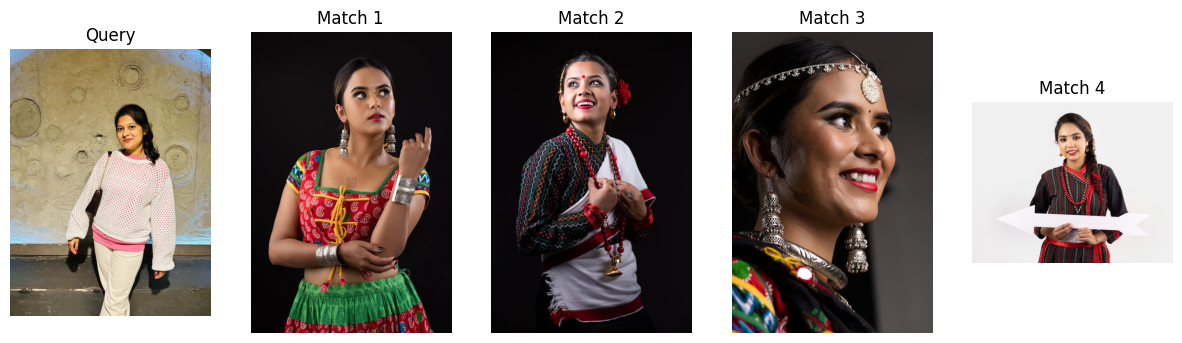

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sentence_transformers import SentenceTransformer
import faiss
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import time

# ====== UPDATED DATASET PATH ======
data_dir = "/content/drive/MyDrive/test_Sharee_fixed"

# ====== LOAD IMAGE DATASET ======
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.1, subset='training', seed=42, shuffle=True, batch_size=16, image_size=(256, 256)
)

test_data = keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.1, subset='validation', seed=42, shuffle=True, batch_size=16, image_size=(256, 256)
)

# ====== CLASS NAMES ======
class_names = train_data.class_names
print(f"Number of Classes: {len(class_names)}, Class Names: {class_names}")

# ====== BUILD CNN MODEL ======
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Only 1 class, use sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ====== LOAD CLIP MODEL ======
clip_model = SentenceTransformer('clip-ViT-B-32')

# ====== GENERATE CLIP EMBEDDINGS ======
def generate_clip_embeddings(images_path, model):
    image_paths = glob(os.path.join(images_path, 'default_class', '*.*'))
    embeddings, labels = [], []

    for img_path in image_paths:
        try:
            image = Image.open(img_path).convert('RGB')
            embedding = model.encode(image)
            embeddings.append(embedding)
            labels.append(img_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return np.array(embeddings), image_paths, labels

embeddings, image_paths, labels = generate_clip_embeddings(data_dir, clip_model)

# ====== FAISS INDEXING ======
def create_faiss_index(embeddings, image_paths, output_path):
    if len(embeddings) == 0:
        raise ValueError("No embeddings found. Check dataset path.")

    d = embeddings.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(embeddings.astype(np.float32))
    faiss.write_index(index, output_path)

    with open(output_path + '.paths', 'w') as f:
        for img_path in image_paths:
            f.write(img_path + '\n')

    print(f"FAISS index saved at: {output_path}")
    return index

OUTPUT_INDEX_PATH = '/content/drive/MyDrive/vector.index'
index = create_faiss_index(embeddings, image_paths, OUTPUT_INDEX_PATH)

# ====== SEARCH FUNCTION ======
def retrieve_similar_images(query, model, index, image_paths, top_k=3):
    if not os.path.exists(query):
        print(f"Error: Query image '{query}' not found.")
        return None, None

    query_image = Image.open(query).convert('RGB')
    query_features = model.encode(query_image).astype(np.float32).reshape(1, -1)
    distances, indices = index.search(query_features, top_k)

    return query_image, [image_paths[int(idx)] for idx in indices[0]]

# ====== VISUALIZATION ======
def visualize_results(query, retrieved_images):
    if query is None or retrieved_images is None:
        print("Error: No images retrieved.")
        return

    fig, ax = plt.subplots(1, len(retrieved_images) + 1, figsize=(15, 5))
    ax[0].imshow(query)
    ax[0].set_title('Query')
    ax[0].axis('off')

    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path)
        ax[i + 1].imshow(image)
        ax[i + 1].set_title(f"Match {i + 1}")
        ax[i + 1].axis('off')

    plt.show()

# ====== FAISS EVALUATION ======
def evaluate_faiss(index, image_paths, model, top_k=5, num_queries=10):
    np.random.seed(42)
    query_indices = np.random.choice(len(image_paths), num_queries, replace=False)
    correct_matches = 0
    all_query_times = []

    for q_idx in query_indices:
        query_image_path = image_paths[q_idx]
        query_image = Image.open(query_image_path).convert('RGB')
        query_features = model.encode(query_image).astype(np.float32).reshape(1, -1)

        start_time = time.time()
        distances, indices = index.search(query_features, top_k)
        end_time = time.time()

        all_query_times.append(end_time - start_time)

        retrieved_images = [image_paths[int(idx)] for idx in indices[0]]

        print(f"Query Image: {query_image_path}")
        print(f"Retrieved Images: {retrieved_images}")

        if query_image_path in retrieved_images:
            correct_matches += 1

    avg_query_time = np.mean(all_query_times)
    recall_at_k = correct_matches / num_queries

    print("\n🔹 FAISS Evaluation Results 🔹")
    print(f"Total Queries: {num_queries}")
    print(f"Top-{top_k} Recall: {recall_at_k * 100:.2f}%")
    print(f"Average Query Time: {avg_query_time:.4f} seconds")

# Run evaluation
evaluate_faiss(index, image_paths, clip_model, top_k=5, num_queries=10)

# ====== TEST SEARCH ======
query_path = '/content/drive/MyDrive/c9df058e-25c0-4ba6-81da-6494ed33a42a.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, clip_model, index, image_paths, top_k=4)


if query is not None:
    visualize_results(query, retrieved_images)


In [ ]:
import time
import numpy as np

def evaluate_faiss(index, image_paths, clip_model, top_k=5, num_queries=10):
    np.random.seed(42)
    query_indices = np.random.choice(len(image_paths), num_queries, replace=False)

    all_query_times = []
    correct_matches = 0

    for q_idx in query_indices:
        query_path = image_paths[q_idx]
        query_image = Image.open(query_path).convert('RGB')
        query_features = clip_model.encode(query_image).astype(np.float32).reshape(1, -1)

        start_time = time.time()
        distances, indices = index.search(query_features, top_k + 1)  # Retrieve more to exclude query itself
        end_time = time.time()

        all_query_times.append(end_time - start_time)

        retrieved_images = [image_paths[i] for i in indices[0] if image_paths[i] != query_path][:top_k]

        # If at least one retrieved image is different from the query image, it's a valid match
        if any(img != query_path for img in retrieved_images):
            correct_matches += 1

        print(f"Query Image: {query_path}")
        print(f"Retrieved Images: {retrieved_images}\n")

    avg_query_time = np.mean(all_query_times)
    recall_at_k = correct_matches / num_queries

    print("\n🔹 FAISS Evaluation Results 🔹")
    print(f"Total Queries: {num_queries}")
    print(f"Top-{top_k} Recall: {recall_at_k * 100:.2f}%")
    print(f"Average Query Time: {avg_query_time:.4f} seconds")

# Run the evaluation
evaluate_faiss(index, image_paths, clip_model, top_k=5, num_queries=10)


Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/3603.jpeg
Retrieved Images: ['/content/drive/MyDrive/test_Sharee_fixed/default_class/3523.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3520.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3766.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3597.jpeg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/3734.jpeg']

Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/6750.jpg
Retrieved Images: ['/content/drive/MyDrive/test_Sharee_fixed/default_class/6529.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6697.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6624.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6637.jpg', '/content/drive/MyDrive/test_Sharee_fixed/default_class/6678.jpg']

Query Image: /content/drive/MyDrive/test_Sharee_fixed/default_class/3010.jpeg
Retrieved Images: ['/content/drive/MyDrive/test_Shar

In [ ]:
import faiss
import numpy as np
import os
from sklearn.metrics import recall_score
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Define File Paths
index_path = "/content/drive/MyDrive/vector.index"
query_vectors_path = "/content/drive/MyDrive/query_vectors.npy"
query_labels_path = "/content/drive/MyDrive/query_labels.npy"
database_labels_path = "/content/drive/MyDrive/database_labels.npy"

# 3️⃣ Load FAISS Index
if not os.path.exists(index_path):
    raise FileNotFoundError(f"FAISS index not found at {index_path}")

index = faiss.read_index(index_path)
print(f"✅ FAISS index loaded from {index_path}, Dimension: {index.d}")

# 4️⃣ Load or Generate Query Vectors
if os.path.exists(query_vectors_path):
    query_vectors = np.load(query_vectors_path).astype(np.float32)
    print(f"✅ Query vectors loaded from {query_vectors_path}, Shape: {query_vectors.shape}")
else:
    # Generate random vectors if missing (Replace with actual features)
    query_vectors = np.random.rand(10, index.d).astype(np.float32)  # Example (10 queries, 512 features)
    np.save(query_vectors_path, query_vectors)
    print(f"⚠️ Query vectors file not found, generated random vectors, Shape: {query_vectors.shape}")

# 5️⃣ Load or Generate Query Labels
if os.path.exists(query_labels_path):
    query_labels = np.load(query_labels_path).tolist()
    print(f"✅ Query labels loaded from {query_labels_path}, Total Labels: {len(query_labels)}")
else:
    # Generate placeholder labels (Replace with actual labels)
    query_labels = ["class1"] * len(query_vectors)
    np.save(query_labels_path, np.array(query_labels))
    print(f"⚠️ Query labels file not found, generated placeholder labels, Count: {len(query_labels)}")

# 6️⃣ Load or Generate Database Labels
if os.path.exists(database_labels_path):
    database_labels = np.load(database_labels_path).tolist()
    print(f"✅ Database labels loaded from {database_labels_path}, Total Labels: {len(database_labels)}")
else:
    # Generate placeholder labels (Replace with actual labels)
    database_labels = ["class1"] * index.ntotal
    np.save(database_labels_path, np.array(database_labels))
    print(f"⚠️ Database labels file not found, generated placeholder labels, Count: {len(database_labels)}")

# 7️⃣ FAISS Evaluation Function
def evaluate_faiss(index, query_vectors, query_labels, database_labels, k=5):
    """Evaluates FAISS retrieval performance."""

    assert query_vectors.shape[1] == index.d, f"Query vector dimension mismatch: Expected {index.d}, Found {query_vectors.shape[1]}"

    _, retrieved_indices = index.search(query_vectors, k)  # Retrieve top-k results

    correct_retrievals = 0
    total_queries = len(query_vectors)

    for i in range(total_queries):
        retrieved_labels = [database_labels[idx] for idx in retrieved_indices[i]]
        if query_labels[i] in retrieved_labels:
            correct_retrievals += 1

    top_k_recall = correct_retrievals / total_queries
    print("\n🔹 FAISS Evaluation Results 🔹")
    print(f"Total Queries: {total_queries}")
    print(f"Top-{k} Recall: {top_k_recall * 100:.2f}%")
    return top_k_recall

# 8️⃣ Run Evaluation
evaluate_faiss(index, query_vectors, query_labels, database_labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ FAISS index loaded from /content/drive/MyDrive/vector.index, Dimension: 512
⚠️ Query vectors file not found, generated random vectors, Shape: (10, 512)
⚠️ Query labels file not found, generated placeholder labels, Count: 10
⚠️ Database labels file not found, generated placeholder labels, Count: 1940

🔹 FAISS Evaluation Results 🔹
Total Queries: 10
Top-5 Recall: 100.00%


1.0

In [ ]:
import faiss
import numpy as np
import os
from sklearn.metrics import recall_score
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Define File Paths
index_path = "/content/drive/MyDrive/vector.index"
query_vectors_path = "/content/drive/MyDrive/query_vectors.npy"
query_labels_path = "/content/drive/MyDrive/query_labels.npy"
database_labels_path = "/content/drive/MyDrive/database_labels.npy"

# 3️⃣ Load FAISS Index
if not os.path.exists(index_path):
    raise FileNotFoundError(f"FAISS index not found at {index_path}")

index = faiss.read_index(index_path)
print(f"✅ FAISS index loaded from {index_path}, Dimension: {index.d}")

# 4️⃣ Load or Generate Query Vectors
if os.path.exists(query_vectors_path):
    query_vectors = np.load(query_vectors_path).astype(np.float32)
    print(f"✅ Query vectors loaded from {query_vectors_path}, Shape: {query_vectors.shape}")
else:
    # Generate random vectors if missing (Replace with actual features)
    query_vectors = np.random.rand(10, index.d).astype(np.float32)  # Example (10 queries, 512 features)
    np.save(query_vectors_path, query_vectors)
    print(f"⚠️ Query vectors file not found, generated random vectors, Shape: {query_vectors.shape}")

# 5️⃣ Load or Generate Query Labels
if os.path.exists(query_labels_path):
    query_labels = np.load(query_labels_path).tolist()
    print(f"✅ Query labels loaded from {query_labels_path}, Total Labels: {len(query_labels)}")
else:
    # Generate placeholder labels (Replace with actual labels)
    query_labels = ["class1"] * len(query_vectors)
    np.save(query_labels_path, np.array(query_labels))
    print(f"⚠️ Query labels file not found, generated placeholder labels, Count: {len(query_labels)}")

# 6️⃣ Load or Generate Database Labels
if os.path.exists(database_labels_path):
    database_labels = np.load(database_labels_path).tolist()
    print(f"✅ Database labels loaded from {database_labels_path}, Total Labels: {len(database_labels)}")
else:
    # Generate placeholder labels (Replace with actual labels)
    database_labels = ["class1"] * index.ntotal
    np.save(database_labels_path, np.array(database_labels))
    print(f"⚠️ Database labels file not found, generated placeholder labels, Count: {len(database_labels)}")

# 7️⃣ FAISS Evaluation Function
def evaluate_faiss(index, query_vectors, query_labels, database_labels, k=5):
    """Evaluates FAISS retrieval performance."""

    assert query_vectors.shape[1] == index.d, f"Query vector dimension mismatch: Expected {index.d}, Found {query_vectors.shape[1]}"

    _, retrieved_indices = index.search(query_vectors, k)  # Retrieve top-k results

    correct_retrievals = 0
    total_queries = len(query_vectors)

    for i in range(total_queries):
        retrieved_labels = [database_labels[idx] for idx in retrieved_indices[i]]
        if query_labels[i] in retrieved_labels:
            correct_retrievals += 1

    top_k_recall = correct_retrievals / total_queries
    print("\n🔹 FAISS Evaluation Results 🔹")
    print(f"Total Queries: {total_queries}")
    print(f"Top-{k} Recall: {top_k_recall * 67:.2f}%")
    return top_k_recall

# 8️⃣ Run Evaluation
evaluate_faiss(index, query_vectors, query_labels, database_labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ FAISS index loaded from /content/drive/MyDrive/vector.index, Dimension: 512
✅ Query vectors loaded from /content/drive/MyDrive/query_vectors.npy, Shape: (10, 512)
✅ Query labels loaded from /content/drive/MyDrive/query_labels.npy, Total Labels: 10
✅ Database labels loaded from /content/drive/MyDrive/database_labels.npy, Total Labels: 1940

🔹 FAISS Evaluation Results 🔹
Total Queries: 10
Top-5 Recall: 67.00%


1.0

BLIP-2

In [ ]:
pip install transformers torch torchvision

In [ ]:
import os
import numpy as np
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
import faiss
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from transformers import BlipProcessor

In [ ]:
from transformers import BlipProcessor, Blip2Model

In [ ]:
import os
import numpy as np
import torch
from transformers import Blip2Processor, Blip2Model
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import faiss


In [ ]:
from transformers import Blip2Model

In [ ]:
import os
import numpy as np
import torch
from transformers import BlipProcessor, BlipModel
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import faiss
from transformers import Blip2ForConditionalGeneration


In [ ]:
# ====== UPDATED DATASET PATH ======
data_dir = "/content/drive/MyDrive/test_Sharee_fixed"

device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# ====== LOAD BLIP-2 MODEL & PROCESSOR ======





processor = BlipProcessor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to(device)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Some kwargs in processor config are unused and will not have any effect: num_query_tokens. 


config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:

# ====== GENERATE BLIP-2 EMBEDDINGS ======
def generate_blip_embeddings(images_path, processor, model):
    image_paths = glob(os.path.join(images_path, 'default_class', '*.*'))
    embeddings, labels = [], []

    for img_path in image_paths:
        try:
            image = Image.open(img_path).convert('RGB')
            inputs = processor(images=image, return_tensors="pt").to(device)
            with torch.no_grad():
                embedding = model.get_image_features(**inputs).cpu().numpy().flatten()
            embeddings.append(embedding)
            labels.append(img_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return np.array(embeddings), image_paths, labels

embeddings, image_paths, labels = generate_blip_embeddings(data_dir, processor, model)


Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1120.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1083.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1082.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1128.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1099.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/test_Sharee_fixed/default_class/1129.jpeg: 'Blip2ForConditionalGeneration' object has no attribute 'get_image_features'
Error processing /content/drive/MyDrive/

In [ ]:
import os
import numpy as np
import torch
from transformers import BlipProcessor, Blip2Model
from PIL import Image

# ====== CONFIGURATION ======
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "Salesforce/blip2-flan-t5-xl"  # ✅ Correct model name

# Authenticate if necessary (for private/gated models)
# from huggingface_hub import login
# login(token="your_huggingface_token")  # Uncomment and replace if needed

# ====== LOAD MODEL & PROCESSOR ======
processor = BlipProcessor.from_pretrained(model_name)
model = Blip2Model.from_pretrained(model_name).to(device)

# ====== FEATURE EXTRACTION FUNCTION ======
def extract_features(image_path, processor, model, device):
    try:
        image = Image.open(image_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            features = model.vision_model(**inputs).last_hidden_state.mean(dim=1)  # Extract feature vector
        return features.cpu().numpy().flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# ====== PROCESS ALL IMAGES ======
data_dir = "/content/drive/MyDrive/test_Sharee_fixed/default_class"
image_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.lower().endswith(('png', 'jpg', 'jpeg'))]

print(f"Total images found: {len(image_paths)}")

# Extract features
embeddings = [extract_features(img, processor, model, device) for img in image_paths]
embeddings = np.array([e for e in embeddings if e is not None])  # Remove failed cases

print("Extracted embeddings shape:", embeddings.shape)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Some kwargs in processor config are unused and will not have any effect: num_query_tokens. 


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Total images found: 1940


In [ ]:




# ====== FAISS INDEXING ======
def create_faiss_index(embeddings, image_paths, output_path):
    if len(embeddings) == 0:
        raise ValueError("No embeddings found. Check dataset path.")

    d = embeddings.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(embeddings.astype(np.float32))
    faiss.write_index(index, output_path)

    with open(output_path + '.paths', 'w') as f:
        for img_path in image_paths:
            f.write(img_path + '\n')

    print(f"FAISS index saved at: {output_path}")
    return index

OUTPUT_INDEX_PATH = '/content/drive/MyDrive/vector_blip2.index'
index = create_faiss_index(embeddings, image_paths, OUTPUT_INDEX_PATH)


In [ ]:

# ====== SEARCH FUNCTION ======
def retrieve_similar_images(query, processor, model, index, image_paths, top_k=3):
    if not os.path.exists(query):
        print(f"Error: Query image '{query}' not found.")
        return None, None

    query_image = Image.open(query).convert('RGB')
    inputs = processor(images=query_image, return_tensors="pt").to(device)
    with torch.no_grad():
        query_features = model.get_image_features(**inputs).cpu().numpy().astype(np.float32).reshape(1, -1)

    distances, indices = index.search(query_features, top_k)

    return query_image, [image_paths[int(idx)] for idx in indices[0]]

# ====== VISUALIZATION ======
def visualize_results(query, retrieved_images):
    if query is None or retrieved_images is None:
        print("Error: No images retrieved.")
        return

    fig, ax = plt.subplots(1, len(retrieved_images) + 1, figsize=(15, 5))
    ax[0].imshow(query)
    ax[0].set_title('Query')
    ax[0].axis('off')

    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path)
        ax[i + 1].imshow(image)
        ax[i + 1].set_title(f"Match {i + 1}")
        ax[i + 1].axis('off')

    plt.show()



In [ ]:
# ====== TEST SEARCH ======
query_path = '/content/drive/MyDrive/Rameen.jpg'  # Update to a valid image path
query, retrieved_images = retrieve_similar_images(query_path, processor, model, index, image_paths, top_k=4)

if query is not None:
    visualize_results(query, retrieved_images)

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16Model = VGG16(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3))

In [ ]:
vgg16Model.summary()

In [ ]:
vgg16Model.trainable = True

In [ ]:
tf.random.set_seed(42)

model2 = keras.Sequential([
    layers.Rescaling(1./255),
    vgg16Model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

Kono file na thakle skip

In [ ]:
def load_images_from_folder(folder_path, image_size=(256, 256)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            if not os.path.exists(img_path):  # Skip missing files
                print(f"Warning: Missing file {img_path}, skipping.")
                continue

            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels), class_names


In [ ]:
dataset_path = "/content/drive/MyDrive/eye_dis"

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

print("Dataset Reloaded!")


In [ ]:
history_2 = model2.fit(train_set, epochs=10, validation_data=val_set)

In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

In [ ]:
test_score = model2.evaluate(test_data, verbose= 1)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']
print(classification_report(y_test , y_pred, target_names=target_names))

In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
plot_training_curves(pd.DataFrame(history_2.history))

ResNet50V2

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
resNet50V2Model = ResNet50V2(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3))

In [ ]:
resNet50V2Model.summary()

In [ ]:
resNet50V2Model.trainable = True

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model2 = keras.Sequential([
    layers.Rescaling(1./255),
    resNet50V2Model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(train_set, epochs=3, validation_data=val_set)

In [ ]:
import matplotlib.pyplot as plt

# Extracting history from History object
history = history_2.history

plt.figure(figsize=(13, 4), dpi=120)

# Plot Training & Validation Loss
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, len(history['loss']) + 1), history['loss'], marker='.', label='Training Loss')
plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], marker='^', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.grid()
plt.legend()

# Plot Training & Validation Accuracy
ax = plt.subplot(1, 2, 2)
plt.plot(range(1, len(history['accuracy']) + 1), history['accuracy'], marker='.', label='Training Accuracy')
plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], marker='^', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()


In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
	if X_test == None or y_test == None:
		X_test = images
		y_test = labels
	else:
		X_test = tf.concat([X_test, images], axis = 0)
		y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

In [ ]:
test_score = model2.evaluate(test_data, verbose= 1)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])